#   Capston2 Project :Stock Market Analysis

#In this Capstone project we are going to looking into two crypto currency name Algorand (ALGO) and Polygon (Matic). We are going to compare between these two assets and find a better and less risky and good profitable stock .
### We will be answering the following questions by comparing these two stocks

1.What is the change in price of the stocks over time?

2. What is the daily returns of the stocks? Which is performing better?

3.Find the volatility of the stocks? Which one is better?

4.What are the cumulative returns for the stocks? Which does perform better over the year?

5.Which stock has the most expected Risk?

6.What is the correlation between different stocks daily return?

** Using the OLS Regression Model create a regression equation that models the closing price (the one I think best between two stocks) against independent variables ‘days and open price.’ 


### Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (15,8)
sns.set(rc = {'figure.figsize':(15,8)})

### Get the data for Algorand and Polygon

In [2]:
data1 =pd.read_csv('algorand.csv')
data1.info()
data1 = pd.DataFrame(data1)
data1['Date'] = pd.to_datetime(data1['Date'])
data1.info()
ALGO = data1.set_index('Date')
ALGO = ALGO.loc['2020-01-01':'2021-09-06']
ALGO.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    770 non-null    object 
 1   Open    770 non-null    float64
 2   High    770 non-null    float64
 3   Low     770 non-null    float64
 4   Close   770 non-null    float64
 5   Volume  770 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 36.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    770 non-null    datetime64[ns]
 1   Open    770 non-null    float64       
 2   High    770 non-null    float64       
 3   Low     770 non-null    float64       
 4   Close   770 non-null    float64       
 5   Volume  770 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 36.2 KB


,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,0.2169,0.2269,0.2159,0.2198,1329789
2020-01-02,0.2198,0.2327,0.2109,0.2138,809683
2020-01-03,0.2138,0.2296,0.2138,0.2273,2584828
2020-01-04,0.2273,0.2533,0.2251,0.2347,1749538
2020-01-05,0.2348,0.2380,0.2283,0.2292,1764933


In [4]:
data2 =pd.read_csv('polygon.csv')
data2 = pd.DataFrame(data2)
data2['Date'] = pd.to_datetime(data2['Date'])
PLY = data2.set_index('Date')
PLY = PLY.loc['2020-01-01':'2021-09-06'].drop('Currency',axis=1)
print(PLY.head(5),PLY.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 615 entries, 2020-01-01 to 2021-09-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    615 non-null    float64
 1   High    615 non-null    float64
 2   Low     615 non-null    float64
 3   Close   615 non-null    float64
 4   Volume  615 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 28.8 KB
             Open   High    Low  Close     Volume
Date                                             
2020-01-01  0.014  0.015  0.014  0.015  544108672
2020-01-02  0.015  0.016  0.014  0.015  686574592
2020-01-03  0.015  0.015  0.014  0.015  433395392
2020-01-04  0.015  0.015  0.015  0.015  280514560
2020-01-05  0.015  0.015  0.015  0.015  238260064 None


### Merging two Data by Inner Join

In [5]:
ALPY = pd.merge(ALGO,PLY, on = 'Date',suffixes = ['_algo','_poly'])
ALPY

,Open_algo,High_algo,Low_algo,Close_algo,Volume_algo,Open_poly,High_poly,Low_poly,Close_poly,Volume_poly
Date,,,,,,,,,,
2020-01-01,0.2169,0.2269,0.2159,0.2198,1329789,0.014,0.015,0.014,0.015,544108672
2020-01-02,0.2198,0.2327,0.2109,0.2138,809683,0.015,0.016,0.014,0.015,686574592
2020-01-03,0.2138,0.2296,0.2138,0.2273,2584828,0.015,0.015,0.014,0.015,433395392
2020-01-04,0.2273,0.2533,0.2251,0.2347,1749538,0.015,0.015,0.015,0.015,280514560
2020-01-05,0.2348,0.2380,0.2283,0.2292,1764933,0.015,0.015,0.015,0.015,238260064
...,...,...,...,...,...,...,...,...,...,...
2021-09-02,1.1630,1.1779,1.1231,1.1453,57213,1.467,1.519,1.432,1.445,164727344
2021-09-03,1.1453,1.2683,1.1091,1.2192,156786,1.445,1.497,1.407,1.456,140224832
2021-09-04,1.2192,1.2390,1.1890,1.2058,61605,1.456,1.741,1.446,1.740,350696992


### 1.What is the change in price of the stocks over time?

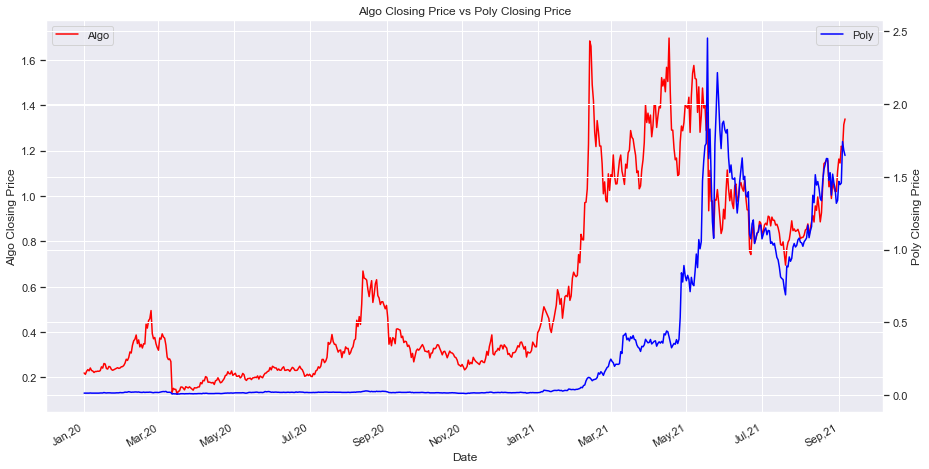

In [6]:
ax = ALPY['Close_algo'].plot(color = 'red', figsize = (15,8) , label = 'Algo')
ax1 = ax.twinx()
ax1 = ALPY['Close_poly'].plot(color = 'blue', figsize = (15,8), label = 'Poly')
ax.set_ylabel('Algo Closing Price')
ax1.set_ylabel('Poly Closing Price')
ax.legend(loc=2)
ax1.legend()
date_time = mdates.DateFormatter('%b,%y')
plt.gca().xaxis.set_major_formatter(date_time)
plt.title('Algo Closing Price vs Poly Closing Price')
plt.show()

##### Both of the stocks price spike suddenly between jan21 to till jul21
##### Polygon rises rapidly than algorand. It surpasses Algorand price.Its highest value approximate 2.5 and Algorand highest spike 1.8

### What is the daily returns of the stocks? Which is performing better?

C:\Users\zunayed\AppData\Local\Temp/ipykernel_19180/1257680804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  algo_poly['dr_al'] = algo_poly['Close_algo'].pct_change()
C:\Users\zunayed\AppData\Local\Temp/ipykernel_19180/1257680804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  algo_poly['dr_pl'] = algo_poly['Close_poly'].pct_change()


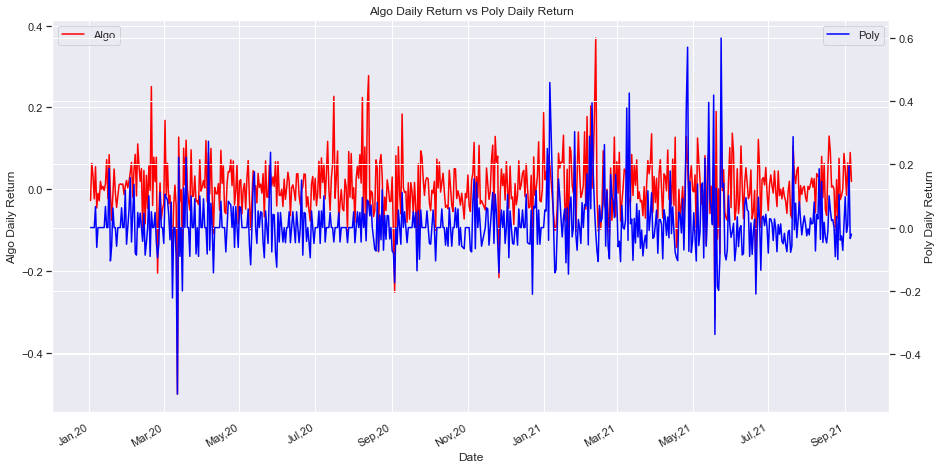

In [7]:
algo_poly = ALPY[['Close_algo','Volume_algo','Close_poly','Volume_poly']]
algo_poly['dr_al'] = algo_poly['Close_algo'].pct_change()
algo_poly['dr_pl'] = algo_poly['Close_poly'].pct_change()
axx = algo_poly['dr_al'].plot(color = 'red', figsize = (15,8) , label = 'Algo')
axx1 = axx.twinx()
axx1 = algo_poly['dr_pl'].plot(color = 'blue', figsize = (15,8), label = 'Poly')
axx.set_ylabel('Algo Daily Return')
axx1.set_ylabel('Poly Daily Return')
axx.legend(loc=2)
axx1.legend()
date_time = mdates.DateFormatter('%b,%y')
plt.gca().xaxis.set_major_formatter(date_time)
plt.title('Algo Daily Return vs Poly Daily Return')
plt.show()

##### Polygon has more variation than Algorand.Algorand is more steady althrough polygon daily return becoming better
##### with recent time but it also bring negative returns more often.

### Find the volatility of the stocks? Which one is better?

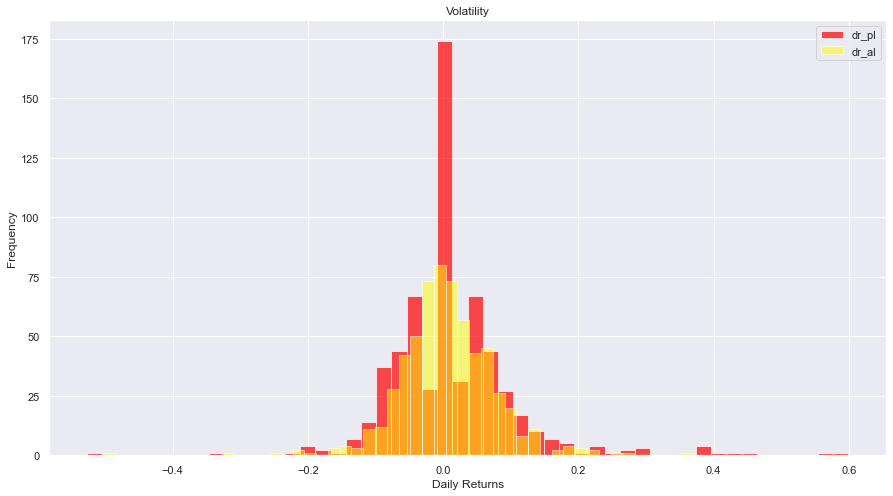

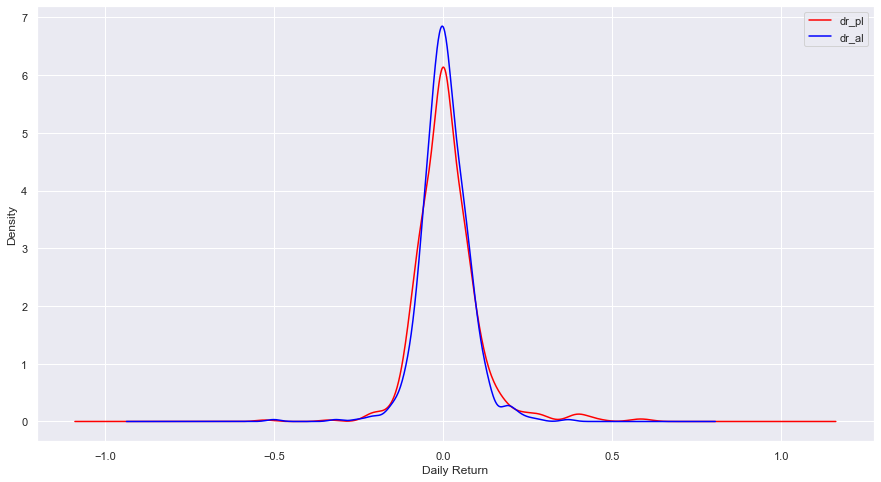

In [8]:
algo_poly['dr_pl'].dropna().plot(kind = 'hist', bins = 50, color = 'red', alpha = 0.7)
algo_poly['dr_al'].dropna().plot(kind = 'hist', bins = 50, alpha = 0.5, color = 'yellow')
plt.legend()
plt.xlabel('Daily Returns')
plt.title('Volatility')
plt.show()

algo_poly['dr_pl'].dropna().plot(kind = 'kde',color = 'red')
algo_poly['dr_al'].dropna().plot(kind = 'kde', color = 'blue')
plt.legend()
plt.xlabel('Daily Return')
plt.show()

##### Polygon has more variance than Algorand.The higher the variance is ,the higher the volatility.Algorand is less volatile than Polygon

### What are the cumulative returns for the stocks? Which does perform better over the year?

C:\Users\zunayed\AppData\Local\Temp/ipykernel_19180/948152910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CR['poly'] = (1+ CR['dr_pl']).cumprod()
C:\Users\zunayed\AppData\Local\Temp/ipykernel_19180/948152910.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CR['algo'] = (1+ CR['dr_al']).cumprod()


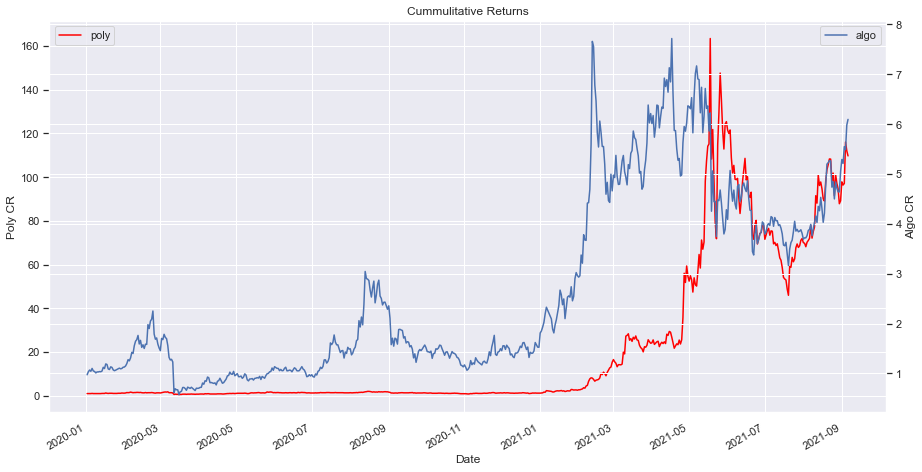

In [9]:
# Find the Cummulitative Returns
CR = algo_poly[['dr_pl','dr_al']]
CR['poly'] = (1+ CR['dr_pl']).cumprod()
cr_x = CR['poly'] .plot(label ='poly', color = 'red')
cr_y = cr_x.twinx()
CR['algo'] = (1+ CR['dr_al']).cumprod()
cr_y =CR['algo'].plot(label= 'algo')
cr_x.set_ylabel('Poly CR')
cr_y.set_ylabel('Algo CR')
cr_x.legend(loc=2)
cr_y.legend()
plt.title('Cummulitative Returns')
plt.show()

###### POlygon has the best return over the years.if we invest 1 dollar at the start of 2020 ,at the end of 2021-09 it gonna be 115

### Which stock has the most expected Risk?

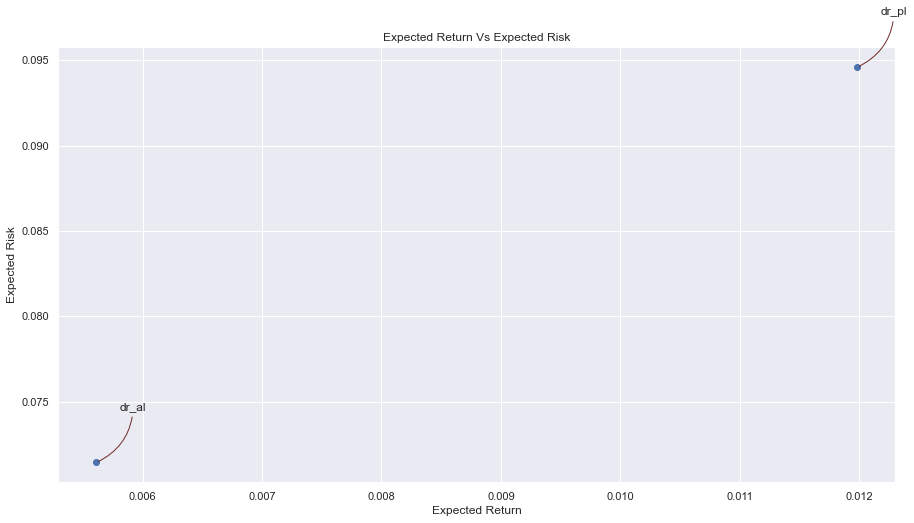

In [10]:
# Risk of a Stock
risk = algo_poly[['dr_pl','dr_al']].dropna()
plt.scatter(risk.mean(),risk.std())
for label, x, y in zip(risk.columns, risk.mean(), risk.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='#732C2C', connectionstyle='arc3,rad=-0.3'))
plt.xlabel('Expected Return')
plt.ylabel('Expected Risk')
plt.title('Expected Return Vs Expected Risk')
plt.show()

##### Althrough Polygon has higher return than Algorand but it has a higher risk too.On the other hand Algorand has a little return also it has less risk

### What is the correlation between different stocks daily return?

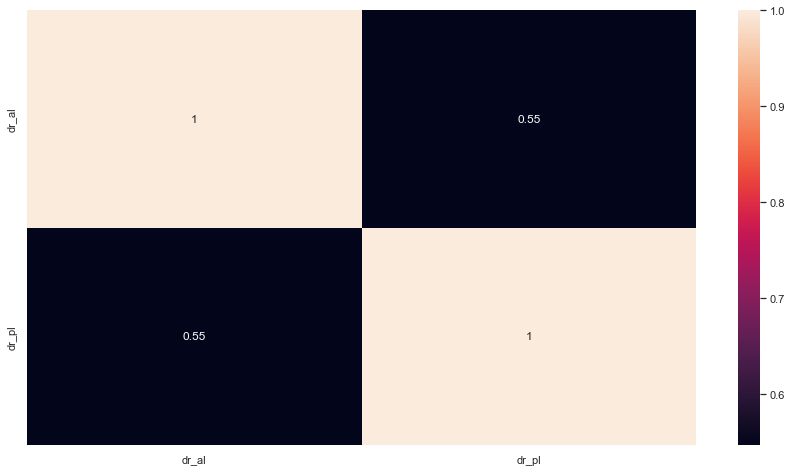

C:\Users\zunayed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Linear Regression between Algo and Poly')

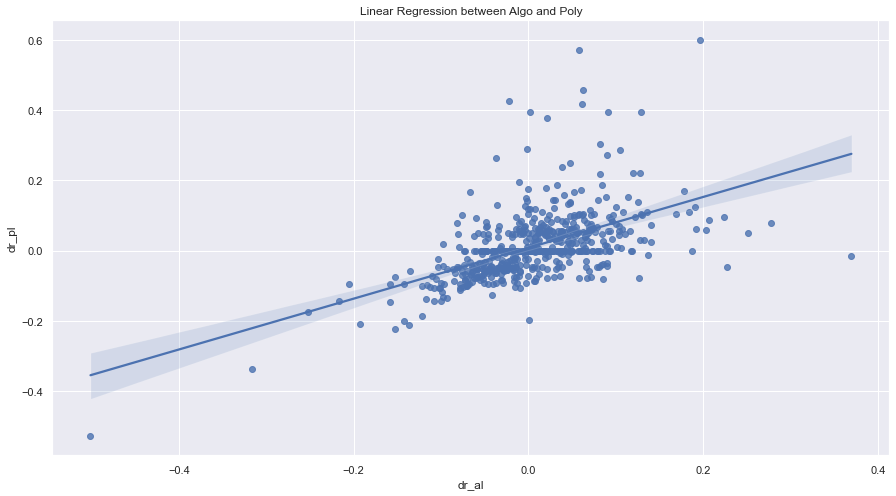

In [11]:
corr_algo_poly = algo_poly[['dr_al','dr_pl']] .corr(method = 'pearson')
sns.heatmap(data = corr_algo_poly, annot = True)
plt.show()
sns.set(rc = {'figure.figsize':(15,8)})
sns.regplot('dr_al','dr_pl', data = algo_poly)
plt.title('Linear Regression between Algo and Poly')

##### The pearson coefficeint correlation between the daily return is 0.55.Althrough its not so strong but we still can plot a trend line to see its price movement.

### Using the OLS Regression Model create a regression equation that models the closing price (the one I think best between two stocks) against independent variables ‘days and open price.’

In [12]:
ALGO.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.996283,0.990086,0.990997,-0.431601
High,0.996283,1.000000,0.989577,0.996245,-0.418456
Low,0.990086,0.989577,1.000000,0.989970,-0.442706
Close,0.990997,0.996245,0.989970,1.000000,-0.434094
Volume,-0.431601,-0.418456,-0.442706,-0.434094,1.000000


In [13]:
# Find a best Fitting Regression Model  
import statsmodels.api as sm
days = np.arange(1,len(ALGO)+1)
ALGO['days'] = days
independent_variables = ALGO[['days','Open']]
dependent_variables = ALGO[['Close']]
independent_variables1 = sm.add_constant(independent_variables)
regression_model = sm.OLS(dependent_variables,independent_variables1).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.679e+04
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:02:13   Log-Likelihood:                 911.85
No. Observations:                 610   AIC:                            -1818.
Df Residuals:                     607   BIC:                            -1804.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.004      0.131      0.8

C:\Users\zunayed\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


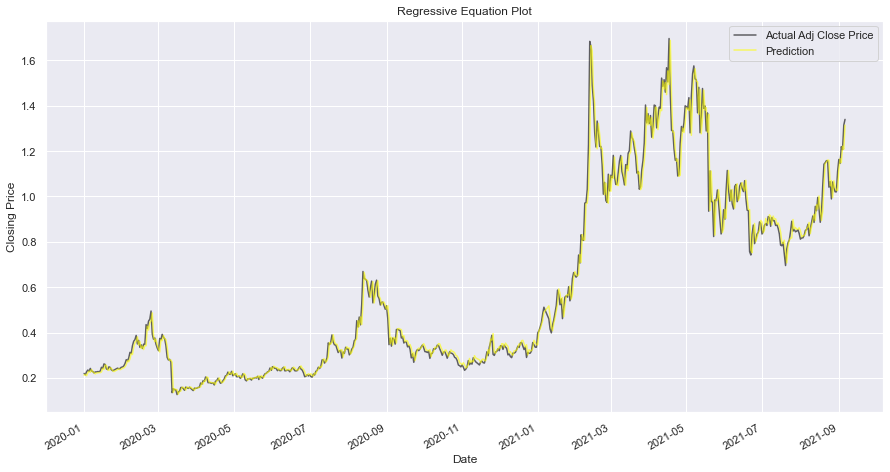

In [14]:
# Plot the Regessive Equation Model
ALGO['Prediction'] = regression_model.predict(independent_variables1)
axe1 = ALGO['Close'].plot(alpha = 0.6, c = 'black', label = 'Actual Adj Close Price')
axe2 = ALGO['Prediction'].plot(alpha = 0.6, c = 'yellow', label = 'Prediction')
plt.title('Regressive Equation Plot')
plt.legend()
plt.ylabel('Closing Price')
plt.show()

In [16]:
#Predict the values
regression_model.predict([1,800,0.92])

array([0.93811136])

##### conclusion: After analysize we can see Polygon return Higher than Algorand.But Polygon is so Volatile and its expected risk is way higher than Algorand.It can goes up high sharply and it can also goes down rapidly .In my opinion  if i am invest money i will go with Algorand.It gives less return but more safe.Again It depend on the investor and their choic.
